In [1]:
import torch 
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed, IntSlider, FloatSlider

from lab2 import grad, GD, momentum, Nesterov, plot_3D, plot_3D_GD, plot_2D_GD_interactive, err

## Esempio 1



In [2]:
def f(x, y):
    return x**2 + y**2

x = torch.linspace(-5, 5, 100).requires_grad_(True)
y = torch.linspace(-5, 5, 100).requires_grad_(True)

fig = plot_3D(x, y, f)
fig.show()

### GD

In [3]:
x_0, y_0 = 2, 3
learning_rate = 0.1
num_epochs = 10

gd = GD(x_0, y_0, learning_rate, num_epochs, f)

fig_3D = plot_3D_GD(x, y, gd[:,0], gd[:,1], f) 
fig_3D.show()

In [4]:
_ = interact(plot_2D_GD_interactive, 
            method = fixed('gd'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(0), 
             y_min = fixed(0), 
             fun = fixed(f), 
             x_0 = FloatSlider(min=-5, max=5, step=0.1, value=2),
             y_0 = FloatSlider(min=-5, max=5, step=0.1, value=3),
             eta = FloatSlider(min = 0, max = 1, step = 0.01, value=0.1), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

interactive(children=(FloatSlider(value=2.0, description='x_0', max=5.0, min=-5.0), FloatSlider(value=3.0, des…

### Momentum

In [5]:
V = torch.zeros(2)
learning_rate = 0.2
num_epochs = 10
beta = 0.5

mom = momentum(x_0, y_0, V, beta, learning_rate, num_epochs, f)

fig_3D = plot_3D_GD(x, y, mom[:,0], mom[:,1], f)
fig_3D.show()

In [6]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('momentum'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(0), 
             y_min = fixed(0), 
             fun = fixed(f), 
             x_0 = FloatSlider(min=-5, max=5, step=0.1, value=2),
             y_0 = FloatSlider(min=-5, max=5, step=0.1, value=3),
             eta = FloatSlider(min = 0, max = 1, step = 0.01, value=0.1), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

interactive(children=(FloatSlider(value=2.0, description='x_0', max=5.0, min=-5.0), FloatSlider(value=3.0, des…

In [7]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


### Nesterov


In [8]:
beta = 0.5
nes = Nesterov(x_0,y_0,V,beta,learning_rate,num_epochs,f)

fig_3D = plot_3D_GD(x, y, nes[:,0], nes[:,1], f)
fig_3D.show()

In [9]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('nesterov'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(0), 
             y_min = fixed(0), 
             fun = fixed(f), 
             x_0 = FloatSlider(min=-5, max=5, step=0.1, value=2),
             y_0 = FloatSlider(min=-5, max=5, step=0.1, value=3),
             eta = FloatSlider(min = 0, max = 1, step = 0.01, value=0.1), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

interactive(children=(FloatSlider(value=2.0, description='x_0', max=5.0, min=-5.0), FloatSlider(value=3.0, des…

### Convergence

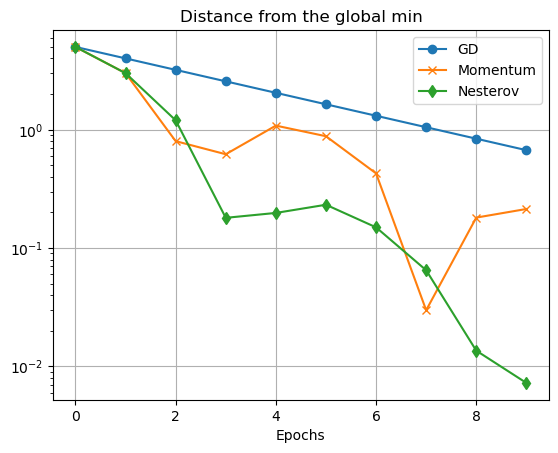

In [10]:
min_glob = torch.Tensor([0,0])
dist_err_gd = err(gd,min_glob,f)
dist_err_mom = err(mom,min_glob,f)
dist_err_nes = err(nes,min_glob,f)

N = range(num_epochs)
plt.semilogy(N,dist_err_gd, marker = 'o', label = 'GD')
plt.semilogy(N,dist_err_mom,marker = 'x', label = 'Momentum')
plt.semilogy(N,dist_err_nes,marker = 'd', label = 'Nesterov')

plt.grid()
plt.xlabel('Epochs')
plt.title('Distance from the global min')
plt.legend()
plt.show()